In [80]:
import konlpy
import pandas as pd

In [81]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran

In [82]:
with open('category1_merge.txt', 'r', encoding='UTF8') as f:
    lines = f.read().splitlines()
lines

['왜 옷들이다 상복처럼 생겼냐?..초상집에서 저옷입고가면 좋아는 하겠다..',
 '처음에는 성공하신분이라 늘 귀기울고 들었는데',
 '이제는 돈쓴거밖에 안올리시네요',
 '구독 끊고 물러갑니다',
 '핏은보세가서수선하세요 이쁘니까',
 '솔직히 디자인은 존나 별로인데 가격은 터무니없이 비싸다... 나같은 서민은 이해불가 ㅠㅠ',
 '착샷도 해주시지',
 '얼굴이나 고치지 패완얼',
 '톰브라운 모델 처럼 정말 잘 어울리세요. ^ ^',
 '자본주의 본보기 많이 벌고 많이 쓴다~ 내돈 내가 쓰는데 뭔상관 근데 쳐다보고 있는 나 왜 서글플까??',
 '백화점매장과 편집샵매장 가격 차이가 2배 가깝게 차이 나는 부분이 브랜드 이미지를 떨어지게 하는것 같아요',
 '원장님은 금수저였으면 성직자같은 정신적성숙을 추구하셨을수도~~',
 '영상에 입고 계신 베이지 니트도 즐겨 입는 것 같던데 어느 제품인가요?',
 '진짜 초부자도 톰브라운 입나. .',
 '조세호가 왜...?',
 '돈이 많은가보다 월 수익 얼마정도 버시나요? ㅎ',
 '너무 검소하시네요 더사세요 마구마구 더!',
 '구경잘했습니다!',
 '패완얼',
 '잠실 면세점에서 일하는데 면세점도 놀러오세요~^^',
 '우리 집도 저런거 개 많음',
 '똑같은것들',
 '',
 '',
 '',
 '',
 '',
 '옷걸이👌👌',
 '원장님 ',
 '',
 '셔츠중에 핑크색이 없네요?',
 '',
 '핑크라고하면 살짝 부담 스러움이 있다고 느끼실 수 있지만, 의외로 고급스럽고, 비지니스 할 때도 산듯하고 세련된 느낌을 주는 느낌입니다',
 '',
 '개취 일 수 있지만, 한번 핑크를 입어보시는것늘 강추 합니다',
 '',
 '단! 핫핑크를 말씀 드리는건 아닙니다^^',
 '핫핑크 사시면 안되요 ㅎㅎ',
 '형 저 맨투맨 하나만 주면 안되나요??',
 '자켓이 비싼만큼 핏이 예쁘긴 하네요',
 '톰브라운은 유독 마름마름한 사람한테 매치가 잘되는 것 같아요! 평균 신체사이즈나 근육질의 남성이 입더라도 이쁘다는 생각은 

In [83]:
sentences = [line for line in lines if (line != '' and line != ' ')]
print(len(sentences))
sentences

11913


['왜 옷들이다 상복처럼 생겼냐?..초상집에서 저옷입고가면 좋아는 하겠다..',
 '처음에는 성공하신분이라 늘 귀기울고 들었는데',
 '이제는 돈쓴거밖에 안올리시네요',
 '구독 끊고 물러갑니다',
 '핏은보세가서수선하세요 이쁘니까',
 '솔직히 디자인은 존나 별로인데 가격은 터무니없이 비싸다... 나같은 서민은 이해불가 ㅠㅠ',
 '착샷도 해주시지',
 '얼굴이나 고치지 패완얼',
 '톰브라운 모델 처럼 정말 잘 어울리세요. ^ ^',
 '자본주의 본보기 많이 벌고 많이 쓴다~ 내돈 내가 쓰는데 뭔상관 근데 쳐다보고 있는 나 왜 서글플까??',
 '백화점매장과 편집샵매장 가격 차이가 2배 가깝게 차이 나는 부분이 브랜드 이미지를 떨어지게 하는것 같아요',
 '원장님은 금수저였으면 성직자같은 정신적성숙을 추구하셨을수도~~',
 '영상에 입고 계신 베이지 니트도 즐겨 입는 것 같던데 어느 제품인가요?',
 '진짜 초부자도 톰브라운 입나. .',
 '조세호가 왜...?',
 '돈이 많은가보다 월 수익 얼마정도 버시나요? ㅎ',
 '너무 검소하시네요 더사세요 마구마구 더!',
 '구경잘했습니다!',
 '패완얼',
 '잠실 면세점에서 일하는데 면세점도 놀러오세요~^^',
 '우리 집도 저런거 개 많음',
 '똑같은것들',
 '옷걸이👌👌',
 '원장님 ',
 '셔츠중에 핑크색이 없네요?',
 '핑크라고하면 살짝 부담 스러움이 있다고 느끼실 수 있지만, 의외로 고급스럽고, 비지니스 할 때도 산듯하고 세련된 느낌을 주는 느낌입니다',
 '개취 일 수 있지만, 한번 핑크를 입어보시는것늘 강추 합니다',
 '단! 핫핑크를 말씀 드리는건 아닙니다^^',
 '핫핑크 사시면 안되요 ㅎㅎ',
 '형 저 맨투맨 하나만 주면 안되나요??',
 '자켓이 비싼만큼 핏이 예쁘긴 하네요',
 '톰브라운은 유독 마름마름한 사람한테 매치가 잘되는 것 같아요! 평균 신체사이즈나 근육질의 남성이 입더라도 이쁘다는 생각은 안들더라구요! 트리콜로 셔츠 제품 맨윗쪽 오픈버튼해서 코디한 남성분을 길가다 본 

In [84]:
import re
import sys

def refine(TEXT):
    EMOJI = re.compile('['
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00010000-\U0010ffff"
                        ']+', flags=re.UNICODE)
    return EMOJI.sub(r'', TEXT)

In [85]:
import random
random = random.sample(sentences, 2000)

In [87]:
with open('random2000.txt', 'w', encoding = 'utf-8') as f:
    for item in random:
        f.write("%s\n" % item)

In [88]:
with open('random2000.txt', 'r', encoding='UTF8') as f:
    lines2 = f.read().splitlines()
lines2

['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [89]:
sentences2 = [line for line in lines2 if (line != '' and line != ' ')]
print(len(sentences2))
sentences2

2000


['와!대박 1',
 'ㅋㅋㅋㅋㅋ진짜 에르메스보다 더잘어울려욬ㅋㅋ 3:52',
 '금수전가..',
 '명품만 이쁘네..',
 '대부분의 사람들은 돈을 많이 버는 사람들을 위해 매일 일하고 있으니까요. 뭐 아무리 본인이 직업에 만족한다해도 돈의 부족함에서 오는 상실감을 겪는다면 충분히 기분이 별로일 수 있죠ㅎ 그래도 사람 일이란 모르는거니 내가 가진 것에 감사하는것이 지금의 최선이네요😄화이팅',
 '으어어어 엄청 기다렸어요😍😍😍',
 '는 내 얘기',
 '얘는 과대포장~할 때 왜이리 귀엽고 웃기죠ㅋㅋㅋㅋㅋㅋ',
 '부럽다요 저는 명품은 내스타일이 아니여서  다 잘어울리네여',
 '진짜 다 개이뽀 오마이갓 ㅠㅠㅠㅠ 나두 언젠가 구찌랑 ㅠ ysl 크엉 이런영상 조아요!!! 자주 올려주세요!!!',
 '진짜 언니가 좋아하는 스타일이 제가 좋아하는 스타일이라 대리만족으로 너무 잘봤어요 ㅠㅠㅠ♡',
 '서주원님 시계 뭐차고 계신건가요? 잠깐보이는데도 엄청 이쁘네요!',
 '본인 돈을  사용하는 거니  제가 말할 부분은 아니지만  영상보고 쓸쓸해서',
 '입생백에서 쉼호흡 하다가 미우미우 케이스에서 울어따 ㅜㅜㅜ 존예시발 존예탱 오열 ㅜㅜㅜㅜㅜ',
 '내눈이 싸구련지 예쁜건지 잘모르겠다..ㅜㅜ',
 '근데 선글라스는 잘 안 어울리는거 같아요,, 개인적인 의견입니닷',
 '귀국하셨을 때 세관비 장난아니셨을거같아요 ㅠ ㅎㅎ 세관비는 어느정도 내는 건가요?',
 '02:05 02:07 너무 귀여우세요 ㅋㅋㅋㅋㅋㅋ',
 '명품 유행 완전히 갔음. 루이비똥도 동화면세점에서 철수할정도로! 그냥 그런 상태임. ㅋㅋㅋㅋ',
 '뭐 욕먹을거 생각하고 올리신것 같은데 보고 싶지 않으면 안보면 되죠 굳이 나쁜 얘기까지 하면서 볼 이유는 없을 것 같아요',
 '영상을 두개올리셨는데 구독자는1만명이네요!! 컨텐츠도 다양한 브랜드,분야에서도 열심히하길 바랍니다ㅎㅎ화이팅',
 '열등감 진짜 오졌다리 ~~~ 한별님 명품길만 걸으세요 💙💙',
 '그쪽들이 하는게 꼰대짓이고 내로남불에 열등감에 빠져 허우

In [103]:
sentences3 = [refine(s) for s in sentences]
print(len(sentences3))
sentences3

11913


['왜 옷들이다 상복처럼 생겼냐?..초상집에서 저옷입고가면 좋아는 하겠다..',
 '처음에는 성공하신분이라 늘 귀기울고 들었는데',
 '이제는 돈쓴거밖에 안올리시네요',
 '구독 끊고 물러갑니다',
 '핏은보세가서수선하세요 이쁘니까',
 '솔직히 디자인은 존나 별로인데 가격은 터무니없이 비싸다... 나같은 서민은 이해불가 ㅠㅠ',
 '착샷도 해주시지',
 '얼굴이나 고치지 패완얼',
 '톰브라운 모델 처럼 정말 잘 어울리세요. ^ ^',
 '자본주의 본보기 많이 벌고 많이 쓴다~ 내돈 내가 쓰는데 뭔상관 근데 쳐다보고 있는 나 왜 서글플까??',
 '백화점매장과 편집샵매장 가격 차이가 2배 가깝게 차이 나는 부분이 브랜드 이미지를 떨어지게 하는것 같아요',
 '원장님은 금수저였으면 성직자같은 정신적성숙을 추구하셨을수도~~',
 '영상에 입고 계신 베이지 니트도 즐겨 입는 것 같던데 어느 제품인가요?',
 '진짜 초부자도 톰브라운 입나. .',
 '조세호가 왜...?',
 '돈이 많은가보다 월 수익 얼마정도 버시나요? ㅎ',
 '너무 검소하시네요 더사세요 마구마구 더!',
 '구경잘했습니다!',
 '패완얼',
 '잠실 면세점에서 일하는데 면세점도 놀러오세요~^^',
 '우리 집도 저런거 개 많음',
 '똑같은것들',
 '옷걸이',
 '원장님 ',
 '셔츠중에 핑크색이 없네요?',
 '핑크라고하면 살짝 부담 스러움이 있다고 느끼실 수 있지만, 의외로 고급스럽고, 비지니스 할 때도 산듯하고 세련된 느낌을 주는 느낌입니다',
 '개취 일 수 있지만, 한번 핑크를 입어보시는것늘 강추 합니다',
 '단! 핫핑크를 말씀 드리는건 아닙니다^^',
 '핫핑크 사시면 안되요 ㅎㅎ',
 '형 저 맨투맨 하나만 주면 안되나요??',
 '자켓이 비싼만큼 핏이 예쁘긴 하네요',
 '톰브라운은 유독 마름마름한 사람한테 매치가 잘되는 것 같아요! 평균 신체사이즈나 근육질의 남성이 입더라도 이쁘다는 생각은 안들더라구요! 트리콜로 셔츠 제품 맨윗쪽 오픈버튼해서 코디한 남성분을 길가다 본 적 

In [104]:
sentences4 = [line for line in sentences3 if (line != '' and line != ' ')]
print(len(sentences4))
sentences4

11903


['왜 옷들이다 상복처럼 생겼냐?..초상집에서 저옷입고가면 좋아는 하겠다..',
 '처음에는 성공하신분이라 늘 귀기울고 들었는데',
 '이제는 돈쓴거밖에 안올리시네요',
 '구독 끊고 물러갑니다',
 '핏은보세가서수선하세요 이쁘니까',
 '솔직히 디자인은 존나 별로인데 가격은 터무니없이 비싸다... 나같은 서민은 이해불가 ㅠㅠ',
 '착샷도 해주시지',
 '얼굴이나 고치지 패완얼',
 '톰브라운 모델 처럼 정말 잘 어울리세요. ^ ^',
 '자본주의 본보기 많이 벌고 많이 쓴다~ 내돈 내가 쓰는데 뭔상관 근데 쳐다보고 있는 나 왜 서글플까??',
 '백화점매장과 편집샵매장 가격 차이가 2배 가깝게 차이 나는 부분이 브랜드 이미지를 떨어지게 하는것 같아요',
 '원장님은 금수저였으면 성직자같은 정신적성숙을 추구하셨을수도~~',
 '영상에 입고 계신 베이지 니트도 즐겨 입는 것 같던데 어느 제품인가요?',
 '진짜 초부자도 톰브라운 입나. .',
 '조세호가 왜...?',
 '돈이 많은가보다 월 수익 얼마정도 버시나요? ㅎ',
 '너무 검소하시네요 더사세요 마구마구 더!',
 '구경잘했습니다!',
 '패완얼',
 '잠실 면세점에서 일하는데 면세점도 놀러오세요~^^',
 '우리 집도 저런거 개 많음',
 '똑같은것들',
 '옷걸이',
 '원장님 ',
 '셔츠중에 핑크색이 없네요?',
 '핑크라고하면 살짝 부담 스러움이 있다고 느끼실 수 있지만, 의외로 고급스럽고, 비지니스 할 때도 산듯하고 세련된 느낌을 주는 느낌입니다',
 '개취 일 수 있지만, 한번 핑크를 입어보시는것늘 강추 합니다',
 '단! 핫핑크를 말씀 드리는건 아닙니다^^',
 '핫핑크 사시면 안되요 ㅎㅎ',
 '형 저 맨투맨 하나만 주면 안되나요??',
 '자켓이 비싼만큼 핏이 예쁘긴 하네요',
 '톰브라운은 유독 마름마름한 사람한테 매치가 잘되는 것 같아요! 평균 신체사이즈나 근육질의 남성이 입더라도 이쁘다는 생각은 안들더라구요! 트리콜로 셔츠 제품 맨윗쪽 오픈버튼해서 코디한 남성분을 길가다 본 적 

In [105]:
tagger = Komoran()
tagged_sentences2 = [tagger.pos(sent) for sent in sentences4]
print(len(tagged_sentences2))
tagged_sentences2[0]

11903


[('왜', 'MAG'),
 ('옷', 'NNG'),
 ('들', 'XSN'),
 ('이', 'VCP'),
 ('다', 'EC'),
 ('상복', 'NNG'),
 ('처럼', 'JKB'),
 ('생기', 'VV'),
 ('었', 'EP'),
 ('냐', 'EF'),
 ('?', 'SF'),
 ('..', 'SE'),
 ('초상', 'NNP'),
 ('집', 'NNG'),
 ('에서', 'JKB'),
 ('저', 'XPN'),
 ('옷', 'NNG'),
 ('입', 'VV'),
 ('고', 'EC'),
 ('가', 'VX'),
 ('면', 'EC'),
 ('좋', 'VA'),
 ('아', 'EC'),
 ('는', 'JX'),
 ('하', 'VV'),
 ('겠', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('.', 'SF')]

In [127]:
adj_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag == 'VA':
            adj_list.append(word)
adj_list2 = [a for a in adj_list if a not in ['좋', '같']]
print(len(adj_list2))
adj_list2[:10]

8351


['이쁘', '비싸', '서글프', '가깝', '많', '많', '똑같', '없', '비싸', '예쁘']

In [128]:
from collections import Counter
adj_counts = Counter(adj_list2)
adj_counts.most_common()

[('예쁘', 1407),
 ('이쁘', 840),
 ('없', 666),
 ('많', 655),
 ('부럽', 537),
 ('이렇', 419),
 ('그렇', 374),
 ('재밌', 281),
 ('비싸', 221),
 ('어떻', 220),
 ('멋지', 171),
 ('다르', 170),
 ('저렇', 148),
 ('멋있', 131),
 ('크', 123),
 ('싫', 103),
 ('귀엽', 99),
 ('시', 90),
 ('즐겁', 79),
 ('힘들', 72),
 ('재미있', 57),
 ('아프', 49),
 ('적', 47),
 ('아름답', 46),
 ('쉽', 44),
 ('나쁘', 44),
 ('옳', 43),
 ('멀', 43),
 ('새롭', 42),
 ('아쉽', 41),
 ('괜찮', 40),
 ('똑같', 38),
 ('편하', 37),
 ('작', 35),
 ('길', 34),
 ('높', 33),
 ('어렵', 30),
 ('깊', 30),
 ('어리', 29),
 ('넓', 29),
 ('아깝', 24),
 ('짧', 22),
 ('싸', 21),
 ('흔하', 20),
 ('엄청나', 19),
 ('심하', 18),
 ('잘나', 18),
 ('밝', 17),
 ('안타깝', 16),
 ('젊', 15),
 ('아니꼽', 15),
 ('낮', 15),
 ('착하', 14),
 ('고맙', 14),
 ('세', 13),
 ('슬프', 13),
 ('늦', 13),
 ('부드럽', 12),
 ('알차', 12),
 ('기쁘', 11),
 ('지나치', 11),
 ('강하', 11),
 ('빨갛', 11),
 ('가깝', 10),
 ('부끄럽', 10),
 ('밉', 10),
 ('못되', 10),
 ('상관없', 9),
 ('빠르', 9),
 ('남다르', 9),
 ('친하', 8),
 ('색다르', 8),
 ('가볍', 8),
 ('좆같', 8),
 ('속상하', 8),
 ('반갑', 7),
 ('하얗', 7),
 (

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [130]:
cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

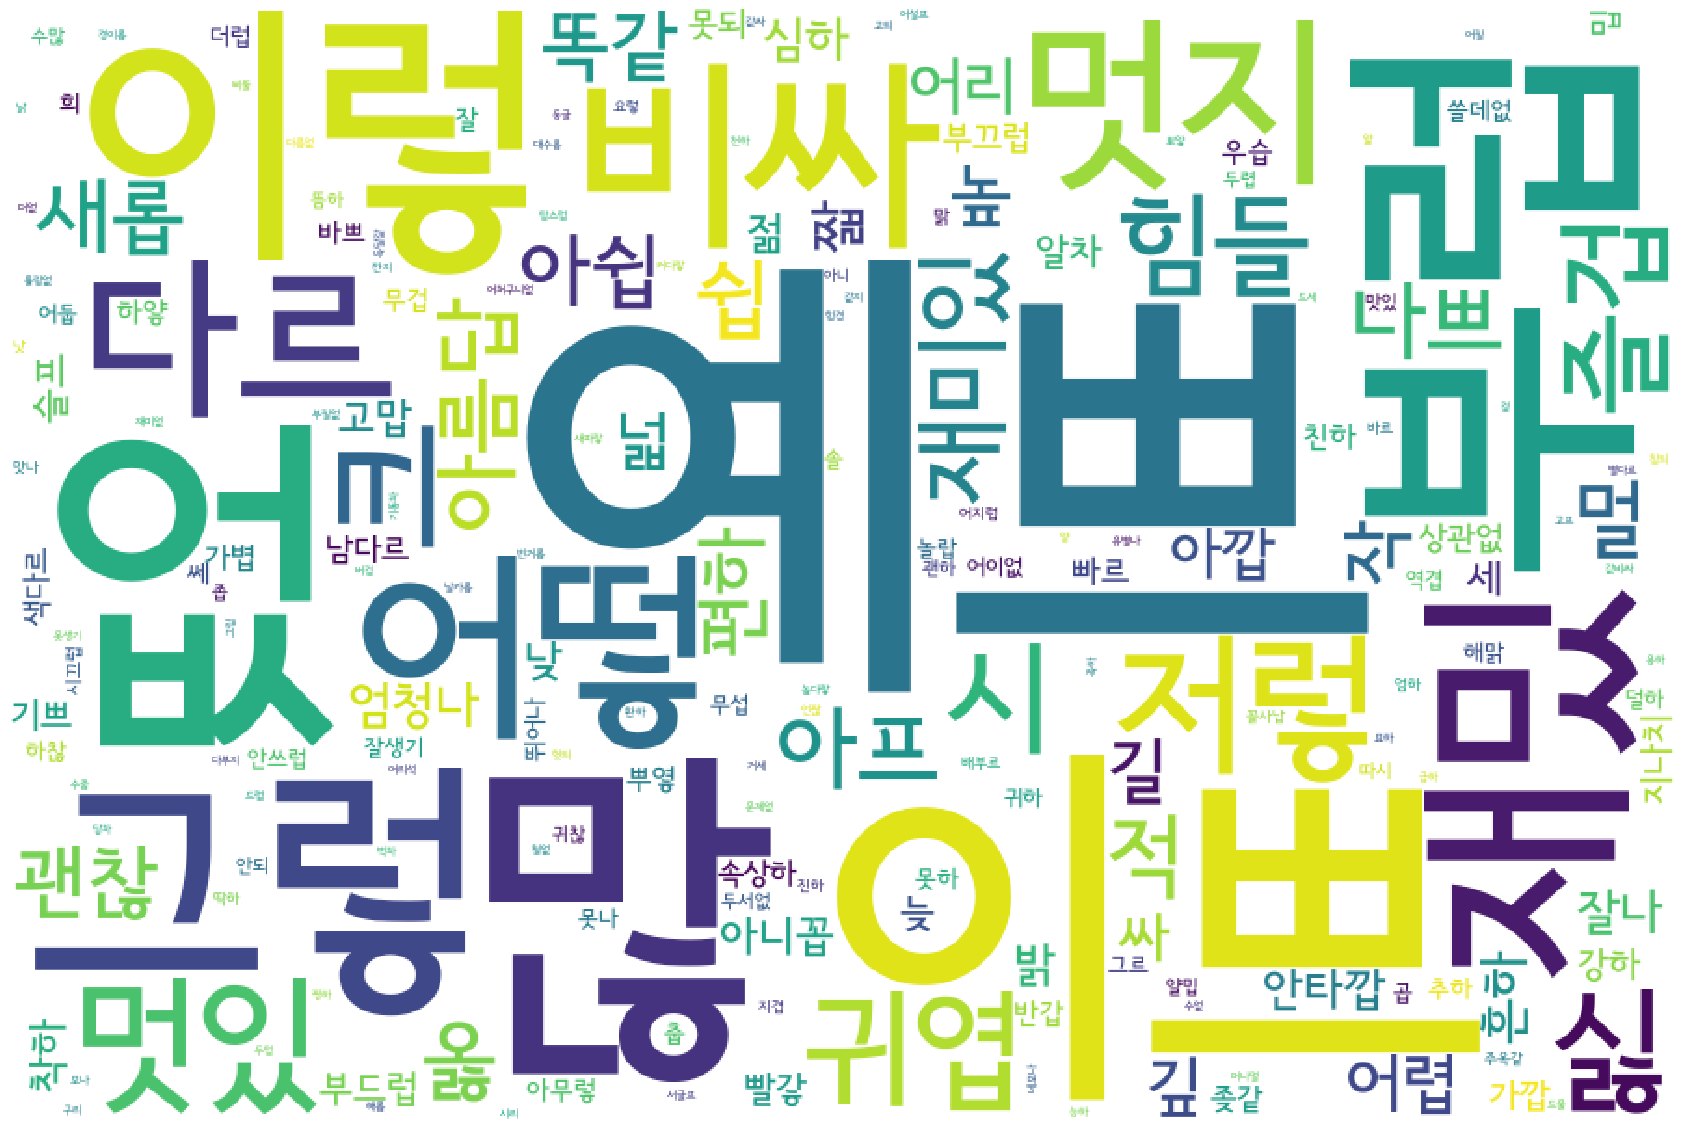

In [131]:
cloud = cloud.fit_words(adj_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [136]:
noun_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list2 = [n for n in noun_list if n not in ['한별', '영상', '언니']]
print(len(noun_list2))
noun_list2[:10]

63214


['옷', '상복', '초상', '집', '옷', '처음', '성공', '귀', '이제', '돈']

In [137]:
noun_counts = Counter(noun_list2)
noun_counts.most_common()

[('명품', 1925),
 ('돈', 1319),
 ('하울', 1208),
 ('사람', 872),
 ('만족', 854),
 ('대리', 828),
 ('!!', 783),
 ('생각', 716),
 ('제품', 669),
 ('가방', 634),
 ('때', 594),
 ('옷', 588),
 ('설명', 586),
 ('말', 565),
 ('구찌', 524),
 ('댓글', 501),
 ('자랑', 492),
 ('넘', 470),
 ('오늘', 458),
 ('브랜드', 411),
 ('느낌', 403),
 ('!!!', 403),
 ('행복', 325),
 ('안', 307),
 ('처음', 304),
 ('감사', 291),
 ('구독', 289),
 ('가격', 288),
 ('미우', 276),
 ('만원', 273),
 ('이랑', 249),
 ('기분', 243),
 ('제가', 242),
 ('패션', 233),
 ('이번', 227),
 ('정보', 224),
 ('소개', 214),
 ('완전', 214),
 ('눈', 214),
 ('본인', 208),
 ('루이비통', 208),
 ('조곤', 203),
 ('구매', 201),
 ('이', 198),
 ('요', 196),
 ('마음', 196),
 ('디자인', 195),
 ('해주시', 185),
 ('취향', 185),
 ('쇼핑', 181),
 ('일', 180),
 ('목소리', 180),
 ('당', 176),
 ('물건', 167),
 ('정도', 166),
 ('가요', 165),
 ('게', 165),
 ('예뻐', 163),
 ('지갑', 152),
 ('백', 151),
 ('예', 150),
 ('스타일', 149),
 ('진짜', 149),
 ('다음', 149),
 ('얼굴', 148),
 ('남', 144),
 ('존', 141),
 ('버', 141),
 ('앞으로', 140),
 ('브라운', 136),
 ('사랑', 135),
 ('톰', 133

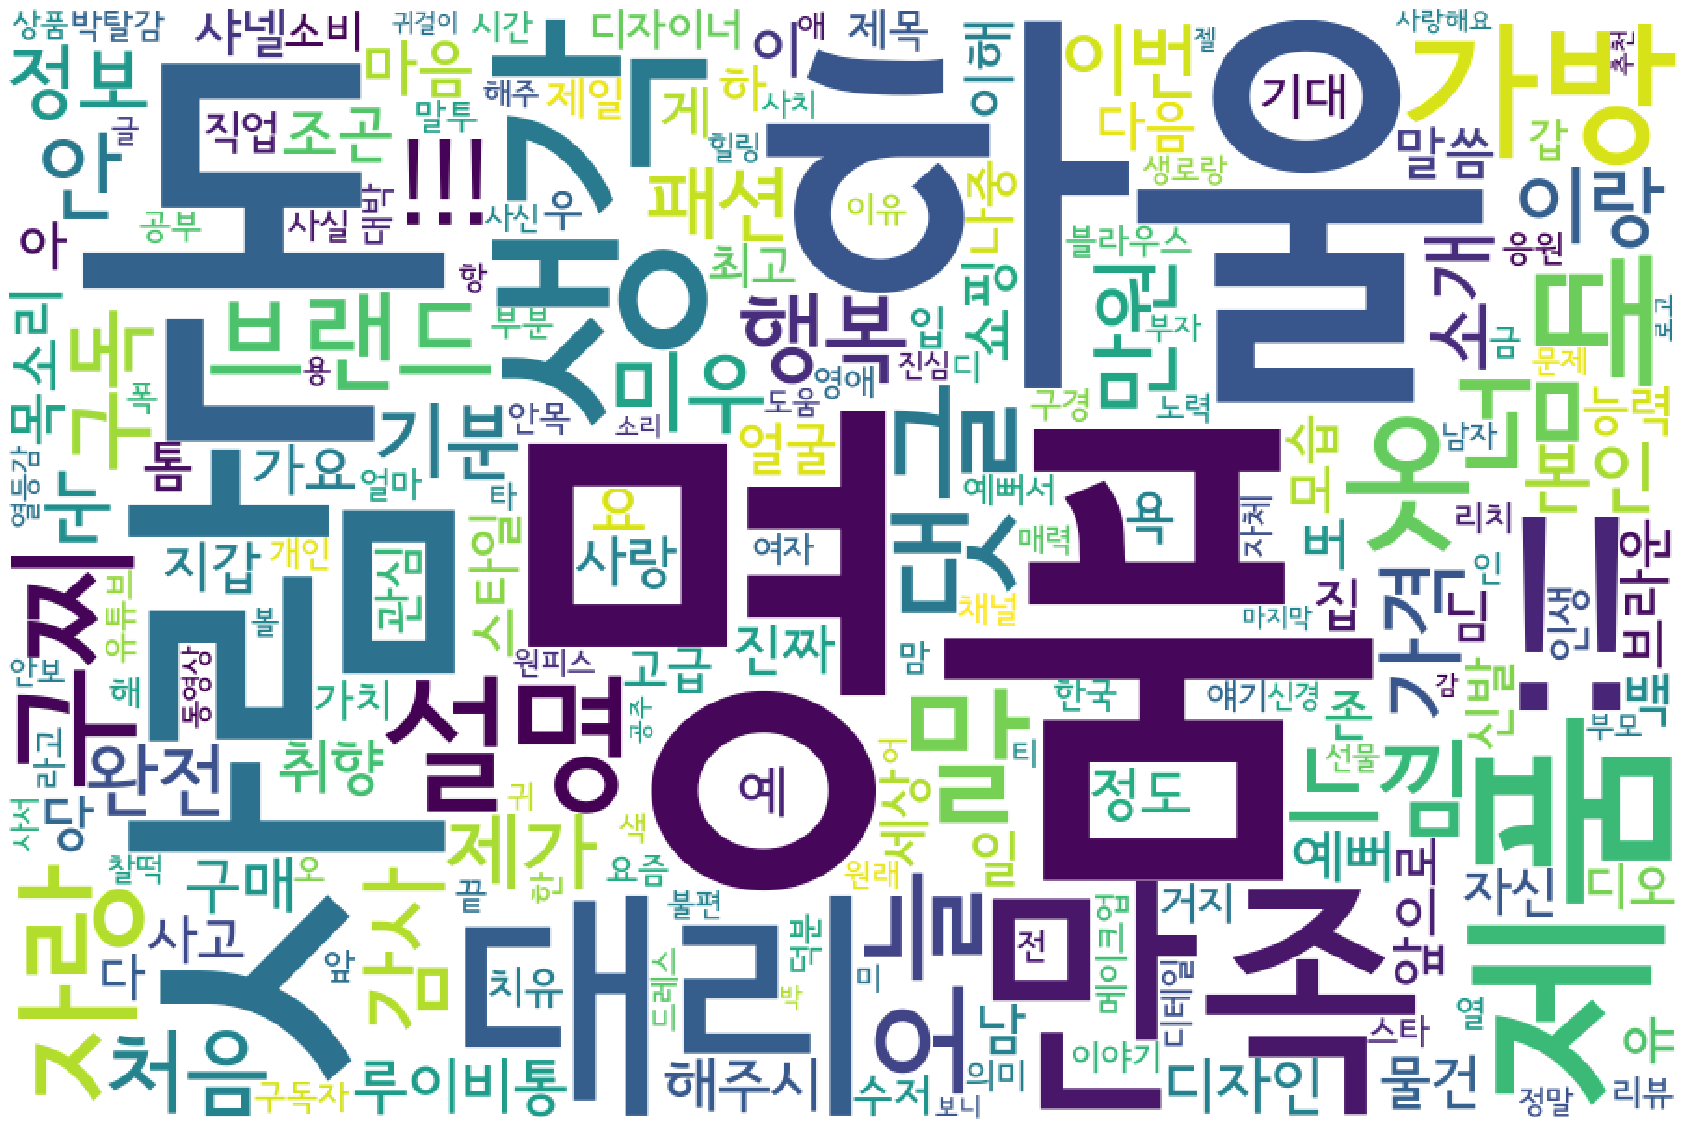

In [138]:
cloud = cloud.fit_words(noun_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.show()